# **Linear Regression Model Summative #Salary Prediction**

In [2]:
# Importing neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
import seaborn as sns
import sklearn


In [3]:
# Loading data
data = pd.read_csv('salary-data.csv')

In [4]:
data.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
# Renaming columns
data.rename(columns={'Years of Experience':'experience','Salary':'salary', 'Job Title': 'job-title', 'Education Level': 'degree', 'Age':'age', 'Gender':'gender'},inplace=True)
data.columns

Index(['age', 'gender', 'degree', 'job-title', 'experience', 'salary'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         373 non-null    float64
 1   gender      373 non-null    object 
 2   degree      373 non-null    object 
 3   job-title   373 non-null    object 
 4   experience  373 non-null    float64
 5   salary      373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [7]:
# Looking for duplicates in the data
data[data.duplicated()].shape

(50, 6)

In [8]:
# Dropping duplucates
new_data = data.drop_duplicates(keep = 'first').copy()
new_data.shape

(325, 6)

In [9]:
# Checking if the is any null value in the data
new_data.isnull().sum()

age           1
gender        1
degree        1
job-title     1
experience    1
salary        1
dtype: int64

In [10]:
# Removing the nul values in the data
new_data.dropna(how='any', inplace=True)
new_data.shape

(324, 6)

# **Data visualization**

/var/folders/9x/rtpndgmj0h10339zr8_g34mw0000gn/T/ipykernel_7262/2179346553.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='degree', y='salary', data=new_data, palette='coolwarm')


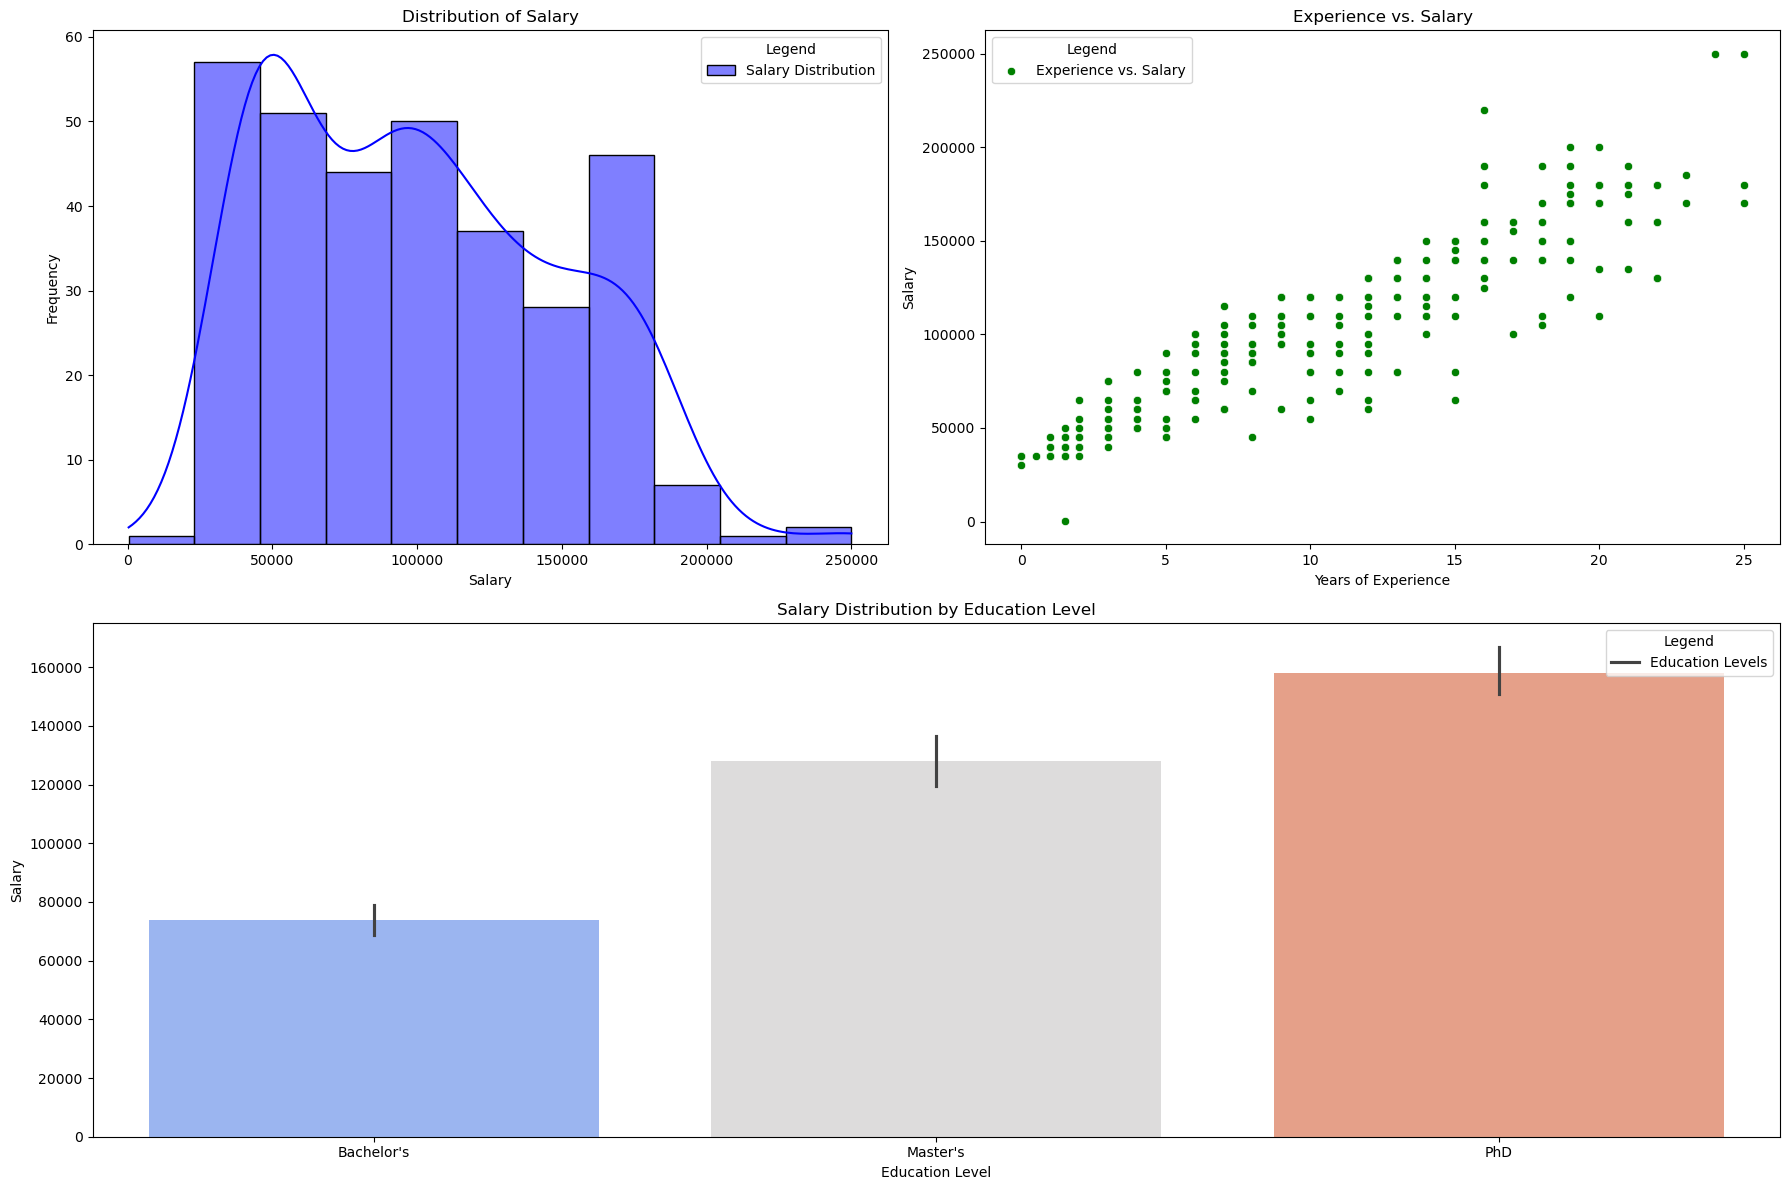

In [11]:
plt.figure(figsize=(18, 12))

# Plot 1: Distribution of Salary
plt.subplot(2, 2, 1)
sns.histplot(new_data['salary'], kde=True, color='blue', label="Salary Distribution")
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend(title="Legend", loc="upper right")

# Plot 2: Relationship between Experience and Salary
plt.subplot(2, 2, 2)
sns.scatterplot(x='experience', y='salary', data=new_data, color='green', label="Experience vs. Salary")
plt.title('Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(title="Legend", loc="upper left", )

# Plot 3: Salary Distribution by Education Level
plt.subplot(2, 1, 2)
sns.barplot(x='degree', y='salary', data=new_data, palette='coolwarm')
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.legend(labels=['Education Levels'], title="Legend", loc="upper right", fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


This scatterplot displays the relationship between years of experience and salary. Each point represents an employee.

In [12]:
# Convert categorical variables
# Create separate encoders for each category
gender_encoder = LabelEncoder()
degree_encoder = LabelEncoder()
job_title_encoder = LabelEncoder()

new_data['gender_num'] = gender_encoder.fit_transform(new_data['gender'])
new_data['degree_num'] = degree_encoder.fit_transform(new_data['degree'])
new_data['job-title_num'] = job_title_encoder.fit_transform(new_data['job-title'])


In [13]:
new_data.head(5)

,age,gender,degree,job-title,experience,salary,gender_num,degree_num,job-title_num
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


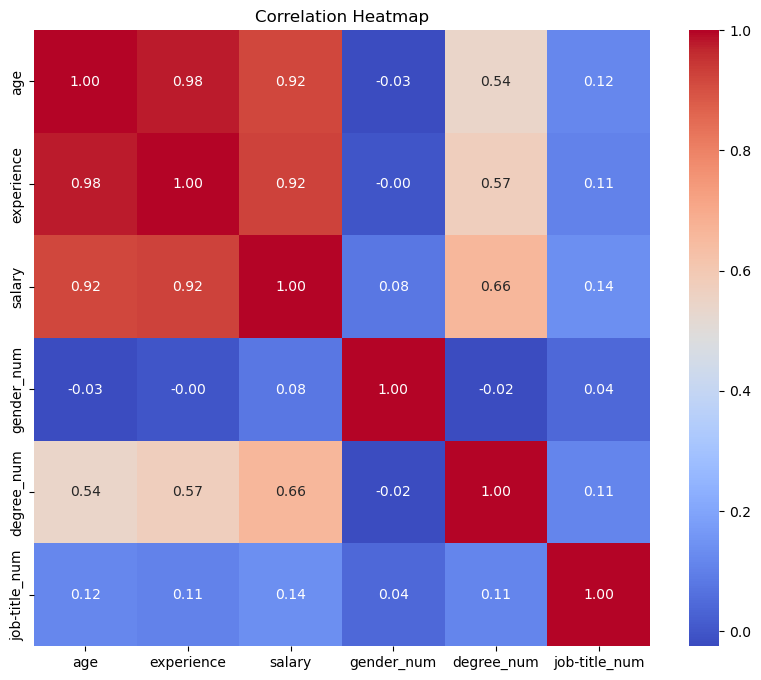

In [14]:
# Generate a linear correlation heatmap
plt.figure(figsize=(10, 8))
numeric_data = new_data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Feature scaling
age_scaler = StandardScaler()
experience_scaler = StandardScaler()

new_data['age_scale'] = age_scaler.fit_transform(new_data[['age']])
new_data['experience_scale'] = experience_scaler.fit_transform(new_data[['experience']])
new_data.head()

,age,gender,degree,job-title,experience,salary,gender_num,degree_num,job-title_num,age_scale,experience_scale
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


In [16]:
# Selecting features and target
X = new_data[['age_scale', 'gender_num', 'degree_num', 'job-title_num', 'experience_scale']]
Y = new_data['salary']

# **Training and making model**





In [17]:
# Splitting the data for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
X_train.shape, Y_train.shape # which is 80%

((259, 5), (259,))

In [19]:
X_test.shape, Y_test.shape # which is 20%

((65, 5), (65,))

In [20]:
# Developing linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [21]:
# Model prediction
Y_pred = lr_model.predict(X_test)
Y_pred

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

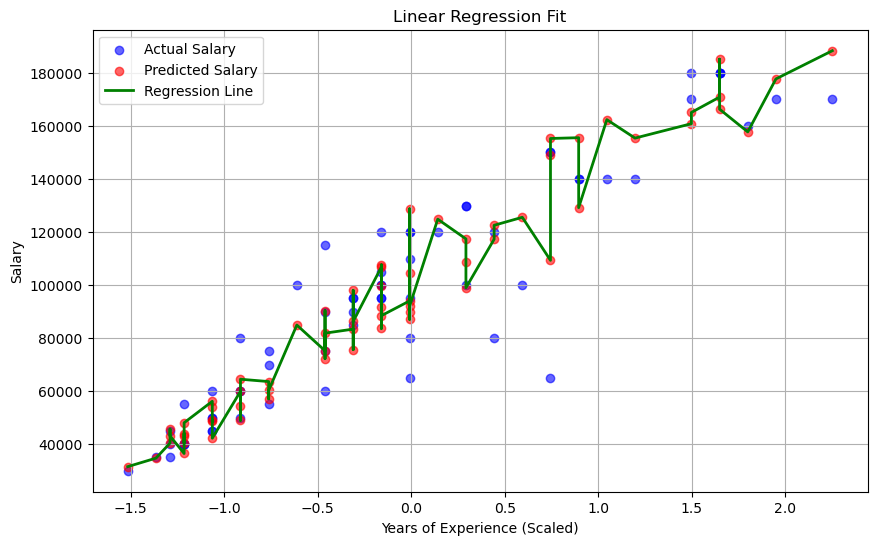

In [22]:
# Creating a scatter plot of the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test['experience_scale'], Y_test, color='blue', label='Actual Salary', alpha=0.6)
plt.scatter(X_test['experience_scale'], Y_pred, color='red', label='Predicted Salary', alpha=0.6)

# Plotting the linear regression line
# Sort the values for a smooth line
sorted_indices = np.argsort(X_test['experience_scale'])
plt.plot(X_test['experience_scale'].iloc[sorted_indices], Y_pred[sorted_indices], color='green', linewidth=2, label='Regression Line')

# Adding labels and title
plt.title('Linear Regression Fit')
plt.xlabel('Years of Experience (Scaled)')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()

In [25]:
# Dataframe of actual and predicted values
df = pd.DataFrame({'Y_actual': Y_test, 'Y_predicted': Y_pred})
df['Error'] = df['Y_actual'] - df['Y_predicted']
df['Abs_error'] = abs(df['Error'])
df

,Y_actual,Y_predicted,Error,Abs_error
132,100000.0,117415.913446,-17415.913446,17415.913446
108,100000.0,125562.807428,-25562.807428,25562.807428
137,50000.0,48965.153862,1034.846138,1034.846138
9,110000.0,128739.348880,-18739.348880,18739.348880
181,105000.0,106828.499305,-1828.499305,1828.499305
...,...,...,...,...
104,80000.0,117279.788471,-37279.788471,37279.788471
233,85000.0,83396.821876,1603.178124,1603.178124
60,170000.0,177743.761029,-7743.761029,7743.761029
94,75000.0,72275.144274,2724.855726,2724.855726


In [26]:
# Calculating mean absolute error
MAE = df['Abs_error'].mean()
MAE

10570.786401136173

In [27]:
# Model evaluation
r2_score(Y_test, Y_pred)
print(f"Model accurracy is {round(r2_score(Y_test, Y_pred), 4) * 100} % ")

Model accurracy is 89.11 % 


In [69]:
# Mean absolute error
round(mean_absolute_error(Y_test, Y_pred),2)
print(f"Mean absolute error is {round(mean_absolute_error(Y_test, Y_pred),2)}")

Mean absolute error is 10570.79


In [70]:
# Root mean squared error
rmse = round(np.sqrt(mean_squared_error(Y_test, Y_pred)),2)
print(f"Root mean squared error is {rmse}")

Root mean squared error is 14344.13


In [71]:
# Comparing with other models
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# Fitting the models to the training data
rf_model.fit(X_train, Y_train.to_numpy())
dt_model.fit(X_train, Y_train.to_numpy())

# Making predictions on the testing data
Y_pred_rf = rf_model.predict(X_test)
Y_pred_dt = dt_model.predict(X_test)

# Calculating RMSEs
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
rmse_dt = np.sqrt(mean_squared_error(Y_test, Y_pred_dt))

# Store RMSEs in a dictionary
model_rank = {
    'Linear Regression': rmse,  # rmse that we have calculated above
    'Random Forest': rmse_rf,
    'Decision Trees': rmse_dt
}

# Print model ranking based on RMSE values
sorted_models = sorted(model_rank.items(), key=lambda item: item[1])  # Sort by RMSE

print("Model Rank (Best to Worst):")
for model_name, rmse_value in sorted_models:
    print(f"{model_name}: {rmse_value:.2f}")

Model Rank (Best to Worst):
Random Forest: 12744.01
Linear Regression: 14344.13
Decision Trees: 17791.53


Random Forest has proven to be the best performing model so that's the one I will be using for my predictions

In [74]:
# Creating a dictionary containing all necessary components
model_components = {
    'model': rf_model,
    'label_encoders': {
        'gender': gender_encoder, 
        'degree': degree_encoder, 
        'job-title': job_title_encoder,  
    },
    'scalers': {
        'age': age_scaler,
        'experience': experience_scaler
    },
    # Also save the column names to ensure correct order
    'feature_order': ['age_scale', 'gender_num', 'degree_num', 'job-title_num', 'experience_scale']
}

# Save everything in a single file
with open('salary_prediction_model.pkl', 'wb') as file:
    pickle.dump(model_components, file)
